<a href="https://colab.research.google.com/github/ajou20658/2023S-Ajou-ML/blob/main/HW0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2023-1 기계학습 HW0

###  수강생 여러분 반갑습니다!  첫번째 과제에서는 Numpy, Pandas, Matplotlib과 머신러닝 도구인 sklean에 익숙해지는 것을 목표로 합니다. 과제를 풀기에 앞서 제공된 예제를 한 번씩 실행시켜 보시고 참고하여 과제를 수행하시면 됩니다. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


## (1) 자료의 입/출력과 Pandas 기초

1) 먼저 우리가 사용할 pandas, numpy, matplotlib 라이브러리를 import 해 줍니다. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

2) **```Pandas```**를 이용하면 행과 열로 구성되어 있는 데이터를 손쉽게 읽어들일 수 있어 매우 강력하고 편리합니다.  
<br>
**```csv파일```**은 comma-separted values(csv)로 구성된 데이터 파일이며 쉼표를 기준으로 데이터를 분리한 파일입니다. 데이터 분석 작업에서 가장 많이 사용하는 파일 형식이며, **```pandas```**를 사용하여 다른 형식(TXT, EXCEL 등)도 처리 가능합니다.  
<br>
 **```read_csv 함수```**의 Argument에서 'sep'를 이용하여 구분자(separator)를 지정해 줄 수도 있고, 'index_col'을 이용하여 index의 행번호를 지정해 줄수도 있습니다. 

In [ ]:
data = pd.read_csv('iris.csv', sep=',') # iris 데이터 불러오기
data

EmptyDataError: ignored

3) 우리가 데이터 파일을 불러와서 만든 **```data```**라는 dataframe object에 대하여 
주석을 해제하여 shape, dtype, axes, T, index, columns 등의 함수를 사용해 보도록 합니다. 
<br>
**```shape```**은 행과 열의 개수를 ```tuple``` 변환하며, **```dtype```**은 열을 기준으로 데이터 형태를 반환합니다. 
<br>
**```axes```**는 행과 열의 이름을 list로 반환합니다. T는 전치된 데이터를 얻을 수 있습니다.
<br> 
**```head()```** 함수를 이용하여 해당 데이터의 맨 위 5줄을 볼 수 있습니다.

In [ ]:
#data.shape
#data.dtype
#data.T
#data.index
#data.columns
#data.head()

   3-1) 모든 변수를 미리 보고 싶다면, 다음과 같이 반복문을 사용할 수 있습니다. 

In [ ]:
# for col in data.columns:
#    print('{}\n'.format(data[col].head()))

4) pandas에 내장된 함수들을 이용하여 자료의 기본적인 통계량을 구할 수 있습니다. 

In [ ]:
#data.mean()
#data.std()
data.describe()

NameError: ignored

5) pandas는  numpy array등과의 호환성이 좋습니다. 다양한 자료형을 이용하여 데이터 프레임을 만들 수 있습니다. 

In [ ]:
df = pd.DataFrame({'Number' : 1.,
                    'Timestamp' : pd.Timestamp('20230108'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'Label' : pd.Categorical(["test","train","test","train"]),
                    'Bar' : 'foo' })
df

,Number,Timestamp,C,D,Label,Bar
0,1.0,2023-01-08,1.0,3,test,foo
1,1.0,2023-01-08,1.0,3,train,foo
2,1.0,2023-01-08,1.0,3,test,foo
3,1.0,2023-01-08,1.0,3,train,foo


5-1) 데이터 프레임에서 데이터 선택과 인덱싱은 다음과 같이 합니다. 

In [ ]:
#index 1선택 
df.loc[1]

Number                       1.0
Timestamp    2023-01-08 00:00:00
C                            1.0
D                              3
Label                      train
Bar                          foo
Name: 1, dtype: object

In [ ]:
#column 선택
df['Label']

0     test
1    train
2     test
3    train
Name: Label, dtype: category
Categories (2, object): ['test', 'train']

In [ ]:
#위치로 선택
df.iloc[3]
df.iloc[3:5,0:2]

,Number,Timestamp
3,1.0,2023-01-08


In [ ]:
df[df.Label=='test'] # Label열에서 값이 test인 것만 골라오기

,Number,Timestamp,C,D,Label,Bar
0,1.0,2023-01-08,1.0,3,test,foo
2,1.0,2023-01-08,1.0,3,test,foo


6) 데이터 프레임 객체를 csv 파일 형식으로 쓸 때는 **```to_csv```**함수를 이용합니다.  여기에서도 다양한 옵션을 지정해 줄 수가 있습니다.
<br>
한글로 된 자료를 저장할 경우 가끔씩 깨지는 경우가 있는데, 이럴 때에는 encoding='euc-kr'을 주어 저장합니다. to_excel을 이용해서 excel파일로 저장할 수도 있습니다

In [ ]:
data=df
data.to_csv('data2.csv')
data.to_excel('data3.xlsx', sheet_name='Sheet1')
# 저장 후 파일을 확인해보세요
# 코랩에서는 왼쪽에 있는 세로 바에서 제일 마지막 아이콘(폴더 모양)을 클릭하면 파일들을 볼 수 있습니다

## (2) Numpy 기초

Numpy를 이용하여 수치계산에 특화된 프로그래밍을 할 수가 있습니다. 
<br>
Numpy는 Array라는 단위 객체로 수치 자료를 처리합니다. 

1) list 자료를  Numpy Array 자료형으로 바꿀 수 있습니다. shape과 dtype 함수를 써서 이들의 속성을 알 수 있습니다


In [ ]:
numbers = [1,2,3,4,5]
# 자료형 지정 : arr1 = np.array([1, 2, 3], dtype=np.float64)
arr = np.array(numbers)
arr

array([1, 2, 3, 4, 5])

In [ ]:
print(arr.shape)
print(arr.dtype)
#arr.astype(np.float64)  #형변환

(5,)
int64


1-1) 중첩된 리스트도 Array로 만들 수 있습니다

In [ ]:
arr2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
np.array(arr2)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

2) Numpy의 여러 내장함수를 이용하여 특수한 형태의 array를 만들 수 있습니다

In [ ]:
print(np.ones(10))
print(np.zeros((3,5)))
print(np.arange(2, 7))  #arange 함수에서 마지막 숫자는 포함하지 않습니다.

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[2 3 4 5 6]


3) Numpy의 연산

In [ ]:
arr = np.random.randn(4,6)  #4행 6열의 Normal 랜덤 변수
#np.sum(arr)  #모든 원소의 총합
#arr+arr
#arr * arr  # elementwise 
#arr-arr
#arr[2:3]    #인덱싱

array([[-1.03791104,  1.28931934, -3.09710868,  1.23630585,  0.34561351,
         0.80870113],
       [-2.50913457, -4.66802982, -0.84241919,  1.33212412,  0.98104458,
        -0.2189752 ],
       [-1.59996516, -0.48863309, -0.53962488,  4.27340965,  1.74242221,
        -0.47972044],
       [ 1.1381157 , -1.65792842,  1.63053663, -0.00583722,  2.48863195,
         3.67397398]])

4) Numpy의 함수 

In [ ]:
#arr = np.arange(15).reshape((3, 5))   #크기 변경 : reshape
#arr.T                              # 전치 
#arr.dot(arr.T)                    # dot 곱

In [ ]:
#np.square(arr)  #제곱
#np.sign(arr)   # 부호
#np.ceil(arr)  # 올림(소수1째자리)
#np.sum(arr, axis=1) # 열의 합을 계산
#np.sum(arr, axis=0)
#np.std(arr) : 전체 성분의 표준편차 계산
#np.sort(arr) : 전체 성분 오름차순 정렬
#np.sort(arr)[::-1] #전체 성분 내림차순 정렬

## (3) 데이터 시각화 기초

Matplotlib는, 데이터를 시각화 하기 위해 가장 많이 이용되는 패키지 중 하나입니다. 자료를 손쉽게 시각화 할 수 있습니다

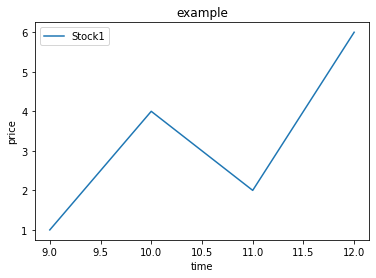

In [ ]:
plt.plot([9, 10, 11, 12], [1, 4, 2, 6])
plt.title('example')  # 제목지정
plt.xlabel('time')
plt.ylabel('price')
plt.legend(['Stock1']) # 범례 삽입

# (4) Sklearn 기초

Sklearn은 머신러닝에서 데이터의 전처리를 포함한 여러 기초 작업에 유용하게 활용 가능한 라이브러리 입니다. 

In [ ]:
from sklearn.model_selection import train_test_split # 데이터를 학습, 검증 데이터로 나누어주는 함수
from sklearn.linear_model import LinearRegression, LogisticRegression  #선형, 로지스틱 회귀분석 #### KNN으로 대체
from sklearn import svm  # Support Vector Machine
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier #랜덤 포레스트 분류기
from sklearn.neighbors import KNeighborsClassifier # KNN 분류기


from sklearn.datasets import load_iris # iris 데이터

1) Sklearn에 있는 예제 데이터(Iris)를 불러 와서, Pandas로 Data Frame을 만들어 봅니다

In [ ]:
iris = load_iris() # iris data 불러오기
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data = pd.DataFrame(iris.data,  columns=iris.feature_names) # iris.feature_names를 dataframe의 열 이름으로 사용
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
target = pd.DataFrame(iris.target, columns = ['target']) # iris 데이터의 클래스 값들 (target value)
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
rawData = pd.concat([data,target], axis=1) # pd.concat: list 안에 있는 데이터프레임들을 열을 기준으로 붙여줍니다.
# axis=0: 행 기준, axis=1: 열 기준
rawData # 오른쪽 열에 target이 추가된 것을 확인할 수 있음

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


2) 1)에서 만든 데이터프레임을 training data와 test data로 분할합니다. <br>
training data 와 test data의 비는 3:1로 설정합니다. <br>
Training data로 분류기를 훈련시키고, test data로 모델(=분류기)을 test합니다.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.25, random_state=0)

In [ ]:
y_test

,target
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [ ]:
x_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [ ]:
#x_train

3) Scikit-learn에서 제공하는 기초 머신러닝 모형을 사용하기 위해 사용가능한 API는 다음과 같습니다. 
분류기를 하나씩 사용해 보면서 실습해 봅니다

* fit(x_train, y_train)     ## 모델을 훈련(학습)합니다.
* predict(x_test)           ## 학습된 모델이 x_test의 label을 예측합니다.
* score(x_test, y_test)     ## 모델의 평균 accuracy(정확도)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)

# clf = tree.DecisionTreeClassifier()
# clf = svm.SVC(kernel='linear')
# clf = RandomForestClassifier(max_depth=2, random_state=0)
# clf = LogisticRegression(solver='lbfgs').fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf.fit(x_train,y_train)  # 분류기 훈련
clf.coef_                 # 추정 된 모수 확인
clf.intercept_            # 추정 된 상수항 확인

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1.45338269, 1.50537328, 5.76365067])

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

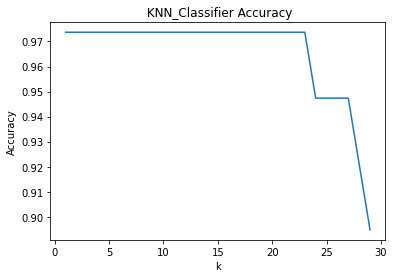

In [ ]:
k_list = range(1,30)
accuracies = []
for k in k_list:
    clf = KNeighborsClassifier(n_neighbors = k)
    #clf.fit(training_data, training_labels)
    clf.fit(x_train, y_train)
    accuracies.append(clf.score(x_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title(" KNN_Classifier Accuracy")
plt.show()